In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from skimage.feature import hog

print("Done Importing")

Done Importing


In [2]:
# Use the following two lines to generate txt files to store the filenames for vehicle and non-vehicle data
# find vehicles -name '*.png' > vehicle-images.txt
# find non-vehicles -name '*.png' > non-vehicle-images.txt
# Iterate through the txt file and save the filenames as a list
with open('./vehicle-images.txt', 'r') as f:
    car_filenames = f.read().splitlines() 
n_cars = len(car_filenames)
print("Numbers of vehicle dataset:", n_cars)

with open('./non-vehicle-images.txt', 'r') as f:
    notcar_filenames = f.read().splitlines()
n_notcars = len(notcar_filenames)
print("Numbers of non vehicle dataset:", n_notcars)

Numbers of vehicle dataset: 8792
Numbers of non vehicle dataset: 8968


In [3]:
def color_conversion(image, color_space):
    # apply color conversion if other than 'BGR'
    if color_space != 'BGR':
        if color_space == 'RGB':
            feature_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        elif color_space == 'HSV':
            feature_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(image, cv2.COLOR_BGR2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
    else: 
        feature_image = np.copy(image)  
    return feature_image

# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  block_norm= 'L2-Hys',
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       block_norm= 'L2-Hys',
                       transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features

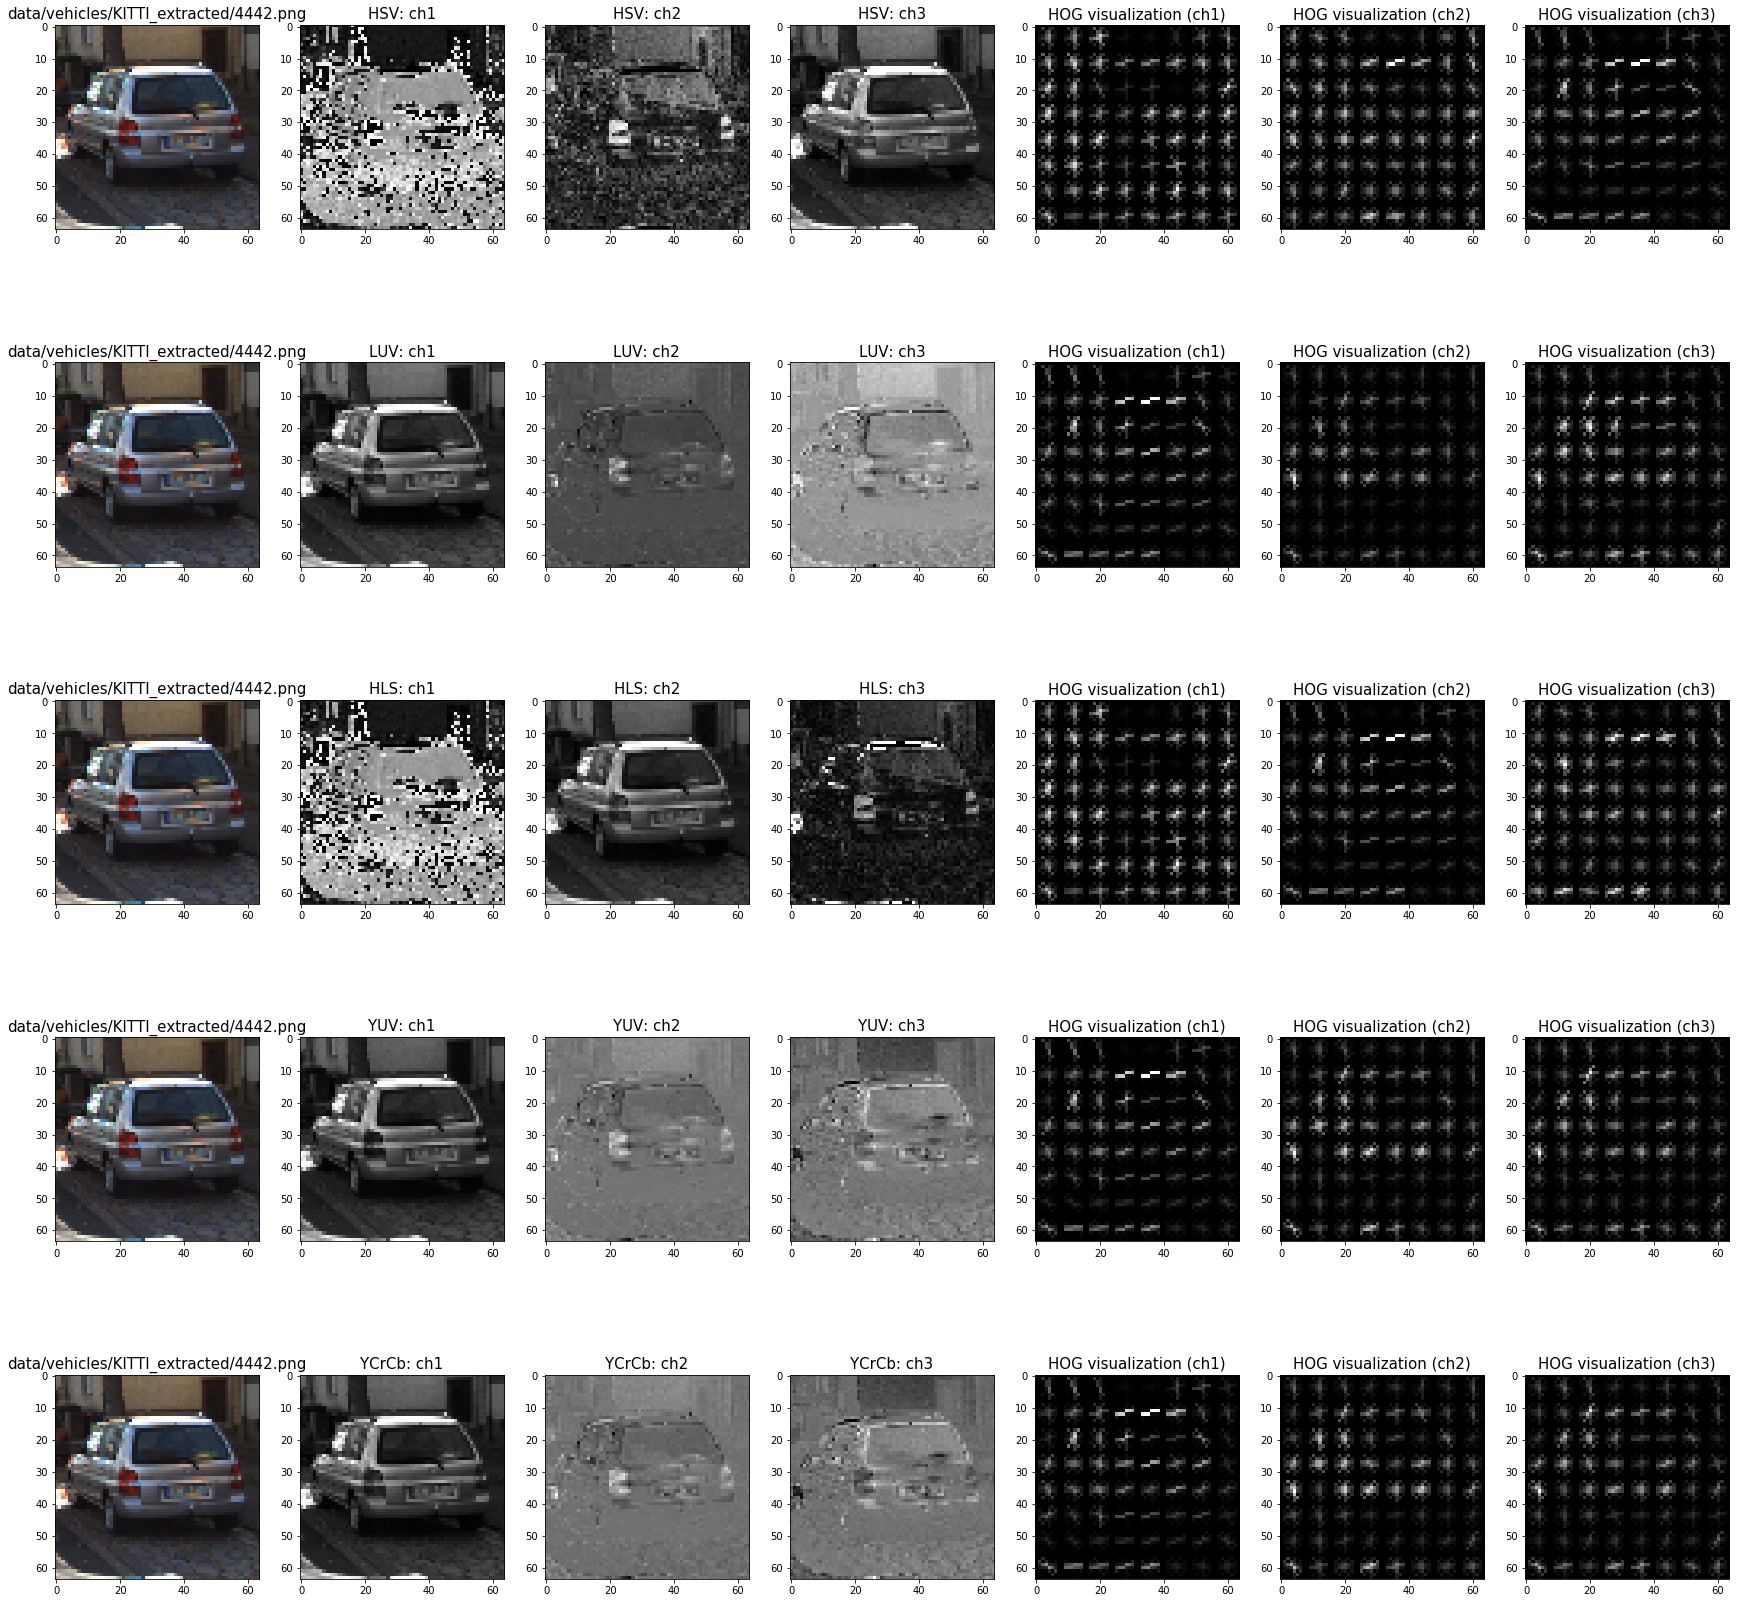

In [4]:
%matplotlib inline

# car_ind = np.random.randint(0, n_cars)
filename = car_filenames[6649]
color_spaces = ['HSV', 'LUV', 'HLS', 'YUV', 'YCrCb']

types = 7
f, axes = plt.subplots(len(color_spaces), types, figsize=(30,30))
axes = axes.ravel()

for i, color_space in enumerate(color_spaces):
    image = cv2.imread(filename)
    axes[types*i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[types*i].set_title(filename, fontsize=15)
    
    color_converted = color_conversion(image, color_space=color_space)
    axes[types*i+1].imshow(color_converted[:,:,0], cmap='gray')
    axes[types*i+1].set_title(color_space + ': ch1' , fontsize=15)
    
    color_converted = color_conversion(image, color_space=color_space)
    axes[types*i+2].imshow(color_converted[:,:,1], cmap='gray')
    axes[types*i+2].set_title(color_space + ': ch2', fontsize=15)
    
    color_converted = color_conversion(image, color_space=color_space)
    axes[types*i+3].imshow(color_converted[:,:,2], cmap='gray')
    axes[types*i+3].set_title(color_space + ': ch3', fontsize=15)
    
    # Call our function with vis=True to see an image output
    features, hog_image = get_hog_features(color_converted[:,:,0], orient= 9, 
                          pix_per_cell= 8, cell_per_block= 2, 
                          vis=True, feature_vec=False)
    axes[types*i+4].imshow(hog_image, cmap='gray')
    axes[types*i+4].set_title('HOG visualization (ch1)', fontsize=15)
    
    # Call our function with vis=True to see an image output
    features, hog_image = get_hog_features(color_converted[:,:,1], orient= 9, 
                          pix_per_cell= 8, cell_per_block= 2, 
                          vis=True, feature_vec=False)
    axes[types*i+5].imshow(hog_image, cmap='gray')
    axes[types*i+5].set_title('HOG visualization (ch2)', fontsize=15)
    
    # Call our function with vis=True to see an image output
    features, hog_image = get_hog_features(color_converted[:,:,2], orient= 9, 
                          pix_per_cell= 8, cell_per_block= 2, 
                          vis=True, feature_vec=False)
    axes[types*i+6].imshow(hog_image, cmap='gray')
    axes[types*i+6].set_title('HOG visualization (ch3)', fontsize=15)

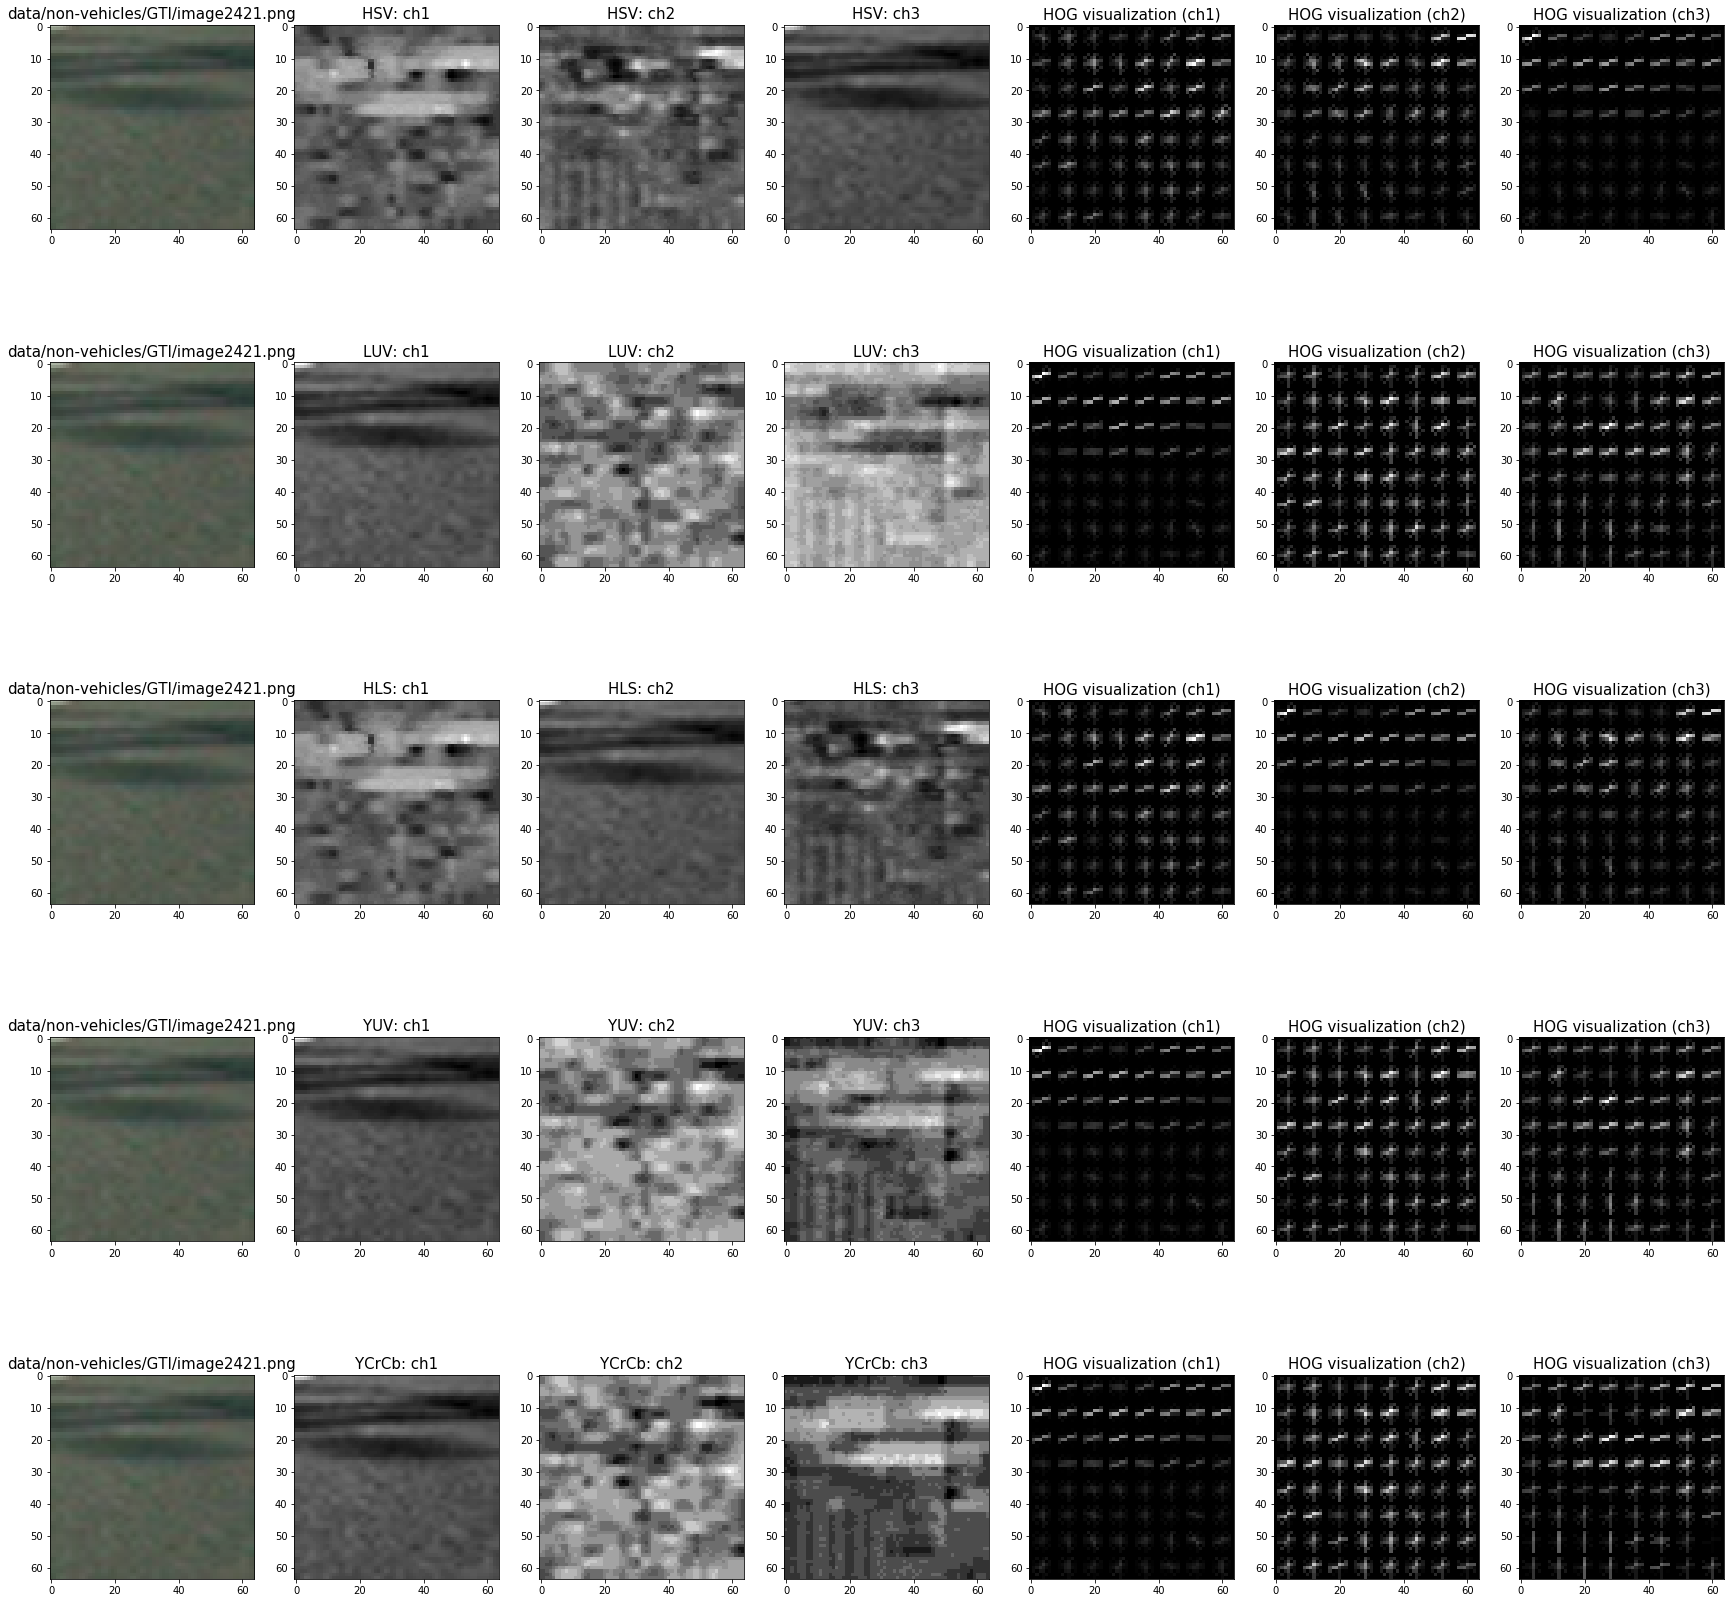

In [5]:
%matplotlib inline

# notcar_ind = np.random.randint(0, n_cars)
filename = notcar_filenames[6649]

types = 7
f, axes = plt.subplots(len(color_spaces), types, figsize=(30,30))
axes = axes.ravel()

for i, color_space in enumerate(color_spaces):
    image = cv2.imread(filename)
    axes[types*i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[types*i].set_title(filename, fontsize=15)
    
    color_converted = color_conversion(image, color_space=color_space)
    axes[types*i+1].imshow(color_converted[:,:,0], cmap='gray')
    axes[types*i+1].set_title(color_space + ': ch1' , fontsize=15)
    
    color_converted = color_conversion(image, color_space=color_space)
    axes[types*i+2].imshow(color_converted[:,:,1], cmap='gray')
    axes[types*i+2].set_title(color_space + ': ch2', fontsize=15)
    
    color_converted = color_conversion(image, color_space=color_space)
    axes[types*i+3].imshow(color_converted[:,:,2], cmap='gray')
    axes[types*i+3].set_title(color_space + ': ch3', fontsize=15)
    
    # Call our function with vis=True to see an image output
    features, hog_image = get_hog_features(color_converted[:,:,0], orient= 9, 
                          pix_per_cell= 8, cell_per_block= 2, 
                          vis=True, feature_vec=False)
    axes[types*i+4].imshow(hog_image, cmap='gray')
    axes[types*i+4].set_title('HOG visualization (ch1)', fontsize=15)
    
    # Call our function with vis=True to see an image output
    features, hog_image = get_hog_features(color_converted[:,:,1], orient= 9, 
                          pix_per_cell= 8, cell_per_block= 2, 
                          vis=True, feature_vec=False)
    axes[types*i+5].imshow(hog_image, cmap='gray')
    axes[types*i+5].set_title('HOG visualization (ch2)', fontsize=15)
    
    # Call our function with vis=True to see an image output
    features, hog_image = get_hog_features(color_converted[:,:,2], orient= 9, 
                          pix_per_cell= 8, cell_per_block= 2, 
                          vis=True, feature_vec=False)
    axes[types*i+6].imshow(hog_image, cmap='gray')
    axes[types*i+6].set_title('HOG visualization (ch3)', fontsize=15)